<b> Define bussiness goal </b>

Predict which passengers will survive the Titanic trip.
Explore the data, find what features are better for your predictions and train them with different 
machine learning algorithms. 
At the end select the one that gave the higher score.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC


df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df =df.drop(['SibSp', 'Parch', 'Cabin'], axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C


<b> EDA </b>

In [3]:
#Check for missing values and were needed replace with their mean or medianvalue 
df['Age'] = df['Age'].fillna(value=df['Age'].mean())

df['Embarked'] = df['Embarked'].str.replace('S', '1').str.replace('C', '2').str.replace('Q', '3')

df['Embarked'] = df['Embarked'].fillna(value=df['Embarked'].median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,2


In [4]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [5]:
#Inspect which are categorical and which numerical.
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [6]:
#Apply one hot encoding to the Sex column
df['Sex']=df['Sex'].replace({'male':'0', 'female': '1'})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,211536,13.0000,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,112053,30.0000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,W./C. 6607,23.4500,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,111369,30.0000,2


In [7]:
by_class = pd.crosstab(df['Survived'],df['Pclass'])
by_class

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<b> Plot </b>

Plot the data to examine the relationships between them.
Assuming that the higher
class a passenger belongs to -wealthier passengers-, the higher chances they have to survive start with the "Pclass" feature by checking for each class separately,. Then do the same for 
the "Sex" feature, based on the assumption
that women were the first to go on the boats. 
Lastly, look also the "Fare "feature. People that payed higher ticket price
are assumambly richer, therefore possibly first to be on the boats. As well the distance of the 1st class cabins where closer to the boats.
Continue with the same method for 2 features more, that may at first seem not relevant but correllations could be found, that weren't visible in the beginning.

#### Pclass feature.

array([<AxesSubplot:title={'center':'1'}, xlabel='Sex'>,
       <AxesSubplot:title={'center':'2'}, xlabel='Sex'>,
       <AxesSubplot:title={'center':'3'}, xlabel='Sex'>], dtype=object)

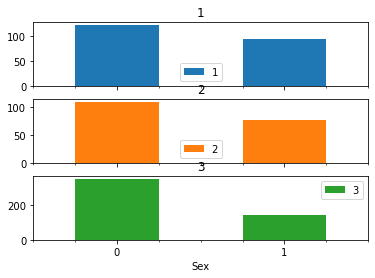

In [8]:
df.groupby(['Sex','Pclass'])['Survived'].count().unstack().plot.bar(rot=0, subplots=True)

#### Age feature.

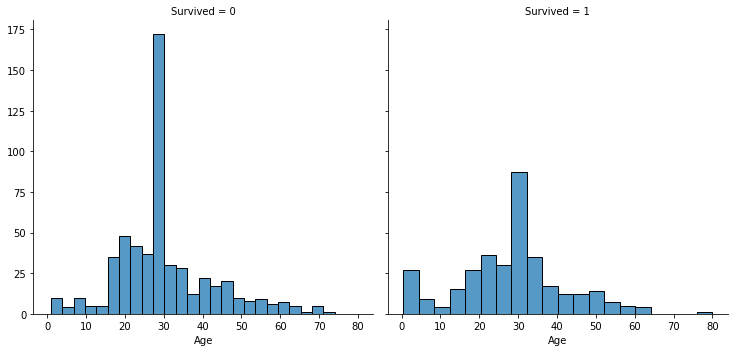

In [9]:
g = sns.FacetGrid(df, col='Survived', height=5, col_wrap=6)
g.map(sns.histplot, 'Age')

#### Fare

Before we need to scale the data.

In [10]:
from sklearn.preprocessing import MinMaxScaler
data = df['Fare'].values.reshape(-1, 1)
scaler = MinMaxScaler()
print(scaler.fit(data))

MinMaxScaler()


In [11]:
scaled_fare = scaler.transform(data)
df['Fare'] = scaled_fare

<ipython-input-12-fa8af2ccb687>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1, 1, 1)


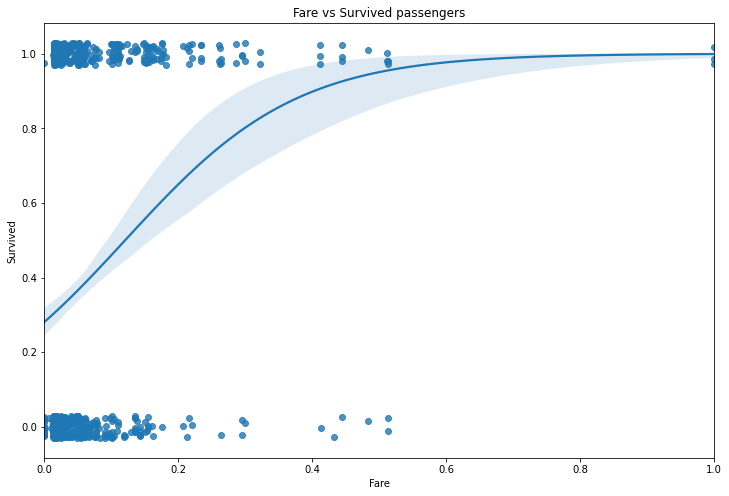

In [12]:
width = 12
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x='Fare', y='Survived', data=df, logistic=True, n_boot=500, y_jitter=.03, dropna = True)
ax = plt.subplot(1, 1, 1)
sns.set_palette("pastel")

ax.set_xlabel("Fare") 
ax.set_ylabel("Survived") 
plt.title("Fare vs Survived passengers")
plt.show()

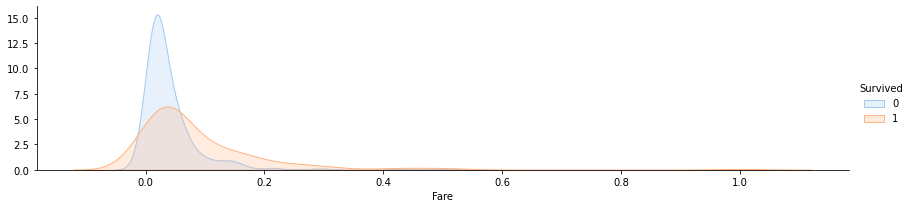

In [13]:
a = sns.FacetGrid( df, hue = 'Survived',  aspect=4 )
a.map(sns.kdeplot, 'Fare', shade= True )
a.add_legend()

#### Age feature.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


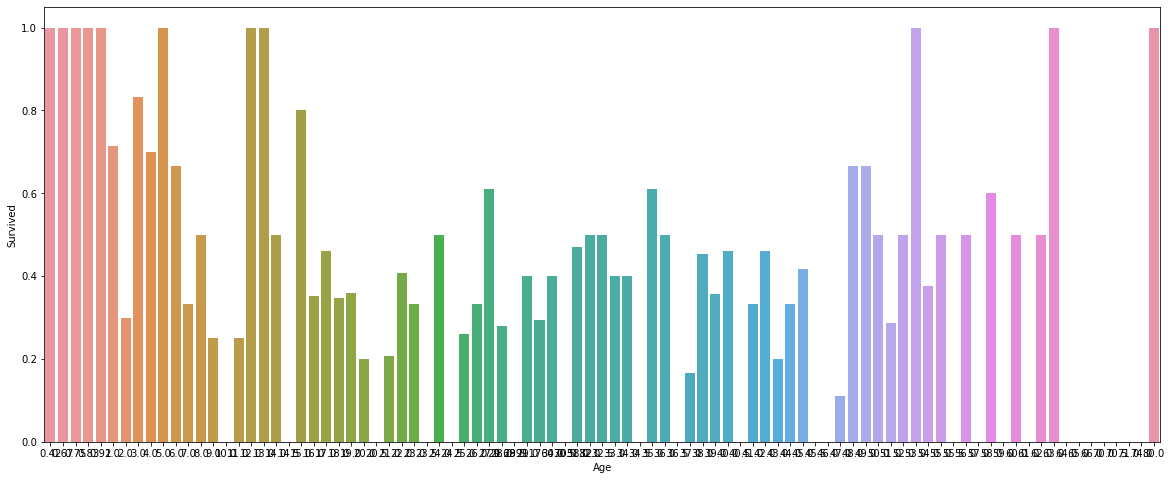

In [14]:
age=df[["Survived",'Age']].groupby('Age', as_index=False).mean()
plt.figure(figsize=(20,8))
sns.barplot('Age','Survived', data=age);

<AxesSubplot:xlabel='Age', ylabel='Count'>

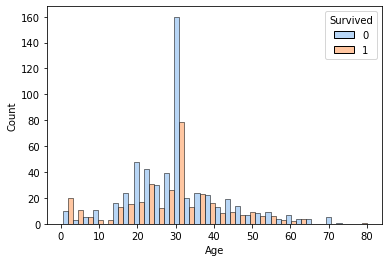

In [15]:
sns.histplot(df, x="Age", hue="Survived", multiple='dodge')

#### Sex feature.

<AxesSubplot:xlabel='Survived', ylabel='count'>

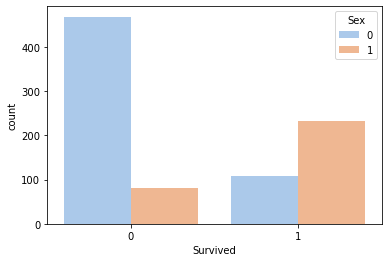

In [16]:
sns.countplot(x='Survived', hue='Sex',data=df)

<b> Feature Engineering </b>

Checking for corellation betweeen the independent variables is part of EDA normally, but here is done after the transformation of the features, that was required so as to conduct a correlation heatmap on the data.

In [17]:
from sklearn.preprocessing import LabelEncoder
#Auto encodes any dataframe column of type category or object.To apply correllation heatmap to all features, they have 
#to be all numerical

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
dummyEncode(df)
df

Error encoding Embarked


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked
0,1,0,3,108,0,22.000000,523,0.014151,1
1,2,1,1,190,1,38.000000,596,0.139136,2
2,3,1,3,353,1,26.000000,669,0.015469,1
3,4,1,1,272,1,35.000000,49,0.103644,1
4,5,0,3,15,0,35.000000,472,0.015713,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,0,27.000000,101,0.025374,1
887,888,1,1,303,1,19.000000,14,0.058556,1
888,889,0,3,413,1,29.699118,675,0.045771,1
889,890,1,1,81,0,26.000000,8,0.058556,2


<b> How to interpret a correlation Heatmap </b>

 Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.


<AxesSubplot:>

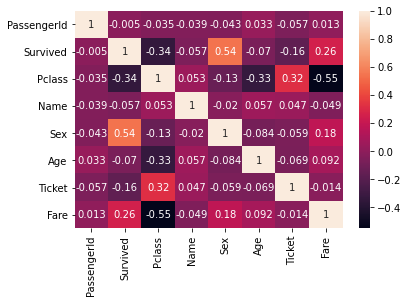

In [18]:
corr = df.corr(method='pearson')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

<b> Select the features to be used as independent variables </b>

Reload the dataset to it's original form, so as to apply Feature Engineering techniques.

In [19]:
r_df = pd.read_csv('train.csv')
r_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
X = r_df[['Pclass', 'Sex', 'Age', 'Fare']]
y = r_df['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [22]:
X_train 

,Pclass,Sex,Age,Fare
105,3,male,28.0,7.8958
68,3,female,17.0,7.9250
253,3,male,30.0,16.1000
320,3,male,22.0,7.2500
706,2,female,45.0,13.5000
...,...,...,...,...
835,1,female,39.0,83.1583
192,3,female,19.0,7.8542
629,3,male,NaN,7.7333
559,3,female,36.0,17.4000


In [23]:
transformed = ColumnTransformer([
    ('minmax', MinMaxScaler(),['Fare']),
    ('onehot', OneHotEncoder(sparse=False), ['Sex']),
    ('missing', SimpleImputer(strategy='median', missing_values=np.nan),['Age']),
    ('standarize', StandardScaler(), list(['Fare','Sex', 'Age'])),
    ('do_nothing', 'passthrough', ['Pclass'])
    ])

In [25]:
transformed.fit(X_train)

In [ ]:
X_train_tr = transformed.transform(X_train)  
X_test_tr = transformed.transform(X_test)
X_test_tr

<b> Logistic Regression Model </b>

In [ ]:
log_reg= LogisticRegression(max_iter=800, random_state=0
                           )
log_reg.fit(X_train_tr,y_train)

y_pred=log_reg.predict(X_test_tr)

#accuracy_score(y_pred, y_test, normalize=True)
log_reg_score = accuracy_score(y_pred, y_test, normalize=True)
log_reg_score

In [ ]:
log_reg_score = accuracy_score(y_pred, y_test)

In [ ]:
#Performance metrics
metrics.confusion_matrix(y_test, y_pred)

clf = SVC(random_state=0)
clf.fit(X_train_tr, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test_tr, y_test)  


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: ', precision)
rec_score = recall_score(y_test, y_pred, average=None)
print('Recall_score :', rec_score)
f1_score = f1_score(y_pred, y_test, average='macro')
print('F1_score', f1_score)

<b> Multinomial Logistic Regression </b>

In [ ]:
#Softmax. Two target variables-> Survived, not Survived.

softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
softReg.fit(X_train_tr,y_train)

y_pred = log_reg.predict(X_test_tr)
accuracy_score(y_pred, y_test)

In [ ]:
X_train_tr

<b> Random Forests </b>

In [ ]:
df

In [ ]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_train_rf

In [ ]:
df.sample()

#The concat function takes a dataframe as argument and X_train_tr is a numpy array. Even if convering the np array to a dataframe it still doesn't  
#have columns etc, that are needed here. So the "not transformed data' of the titanic dataset are used. Work on progress!
#trans_df = pd.DataFrame(X_train_tr)
df_train = pd.concat([X_train_rf, y_train_rf], axis = 1)

forest = []

for i in range(100):
    sample = df_train.sample(40)
    X_test_sample = sample[['Pclass', 'Sex','Age', 'Fare']]
    y_test_sample = sample['Survived']
    tree = DecisionTreeClassifier(max_depth = 9)
    tree.fit(X_test_sample, y_test_sample)
    forest.append(tree)
    print(i, 'tree score', round(tree.score(X_test_rf, y_test_rf), 2))

In [ ]:
trainscores = [tree.score(X_train_rf, y_train_rf) for tree in forest]
trainscores.sort()
rf_m_best_score = trainscores[-1]
rf_m_best_score

In [ ]:
#Random Forest with Scikit
#Also here -as with Desicion Trees algorithm- the value 9 for the parameter max_depth brings the best result
rfc = RandomForestClassifier(n_estimators=100, max_depth=9)
rfc.fit(X_train_rf, y_train)
round(rfc.score(X_train_rf, y_train),3)

In [ ]:
rf_best_score = round(rfc.score(X_test_rf, y_test),3)
rf_best_score

In [ ]:
y_pred = rfc.predict(X_test_rf)
print(classification_report(y_test, y_pred))

<b> Desicion Trees </b>

In [ ]:
def compare_model_param(X_train_tr, X_test_tr, y_train, y_test):
    best_score_list = []
    good_score_list = []
    
    for i in range(1,11):
        m = DecisionTreeClassifier(max_depth=i)
        m.fit(X_train_tr, y_train)
        pred= m.predict(X_test_tr)
        score = accuracy_score(pred, y_test)
        if score < 0.9 and score > 0.8:
            best_score = 'best score with max_depth {0} is the score {1}'.format(i, score)
            best_score_list.append(best_score)
            best_score_list.sort()
        elif score < 0.8 and score > 0.7:
            good_score = 'good score with max_depth {0} is the score {1}'.format(i, score)
            good_score_list.append(good_score)
            good_score_list.sort()
        else:
            print('Try with better parameters')
    return good_score_list[-1], best_score_list[-1]

compare_model_param(X_train_tr, X_test_tr, y_train, y_test)

In [ ]:
dec_tree = DecisionTreeClassifier(class_weight= None, max_depth=9)  # we allow that many questions
dec_tree.fit(X_train_tr, y_train)
pred= dec_tree.predict(X_test_tr)
dec_tree_score = accuracy_score(pred, y_test)
dec_tree_score

In [ ]:
#Performance metrics.

from sklearn.metrics import precision_score
macro = precision_score(y_test, pred, average='macro')
print('Precision (unweighted mean of the metrics)', macro)
micro = precision_score(y_test, pred, average='micro')
print('Precision (count of true pos, false neg ans pos)', micro)
weighted = precision_score(y_test, pred, average='weighted')
print('Precision (number of true instances for each label)', weighted)


<b> Find the best model for your goal</b>

In [ ]:
#according to their score.
data = [log_reg_score, dec_tree_score, rf_best_score]
data
  
score_table = pd.DataFrame(data, columns = ['Scores'], index = ['Log_Reg', 'Dec_Tree', 'R_Forest'])
score_table  